In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

# Time to revert analysis for reverts that were uncategorized by comment

## Data processing

Pulling from analysis/comments/comments-all-langauges.ipynb

In [2]:
with open("data/possible_botfights.pickle", "rb") as f:
    df_all = pickle.load(f)

In [3]:
df_all[0:2].transpose()

reverting_timestamp_dt,2012-02-08 00:14:46,2012-02-08 00:14:51
archived,False,False
language,en,en
page_namespace,6,6
rev_deleted,False,False
rev_id,474726560,475121614
rev_minor_edit,False,False
rev_page,13694272,13694643
rev_parent_id,2.01207e+08,1.98982e+08
rev_revert_offset,1,1
rev_sha1,qe1a8oa0wgbwcw6lm0fk5alwy0vgqt0,9mneyipkuofyjw75uku033ne3jzvnkw


In [4]:
df_all['language'].value_counts()

en    47769
es     9858
fr     6042
de     5996
zh     5306
pt     3662
ja     2110
Name: language, dtype: int64

In [5]:
df_dict = {}
for lang in df_all['language'].unique():
    df_dict[lang] = df_all[df_all['language']==lang].copy()

In [6]:
len(df_dict['en'])

47769

In [7]:
df_all['reverting_timestamp_ordinal'] = [x.toordinal() for x in df_all['reverting_timestamp_dt']]


In [8]:
df_all['reverting_timestamp_ordinal'].describe()

count     80743.000000
mean     734191.369729
std         964.553822
min      731783.000000
25%      733400.000000
50%      733926.000000
75%      734819.000000
max      736299.000000
Name: reverting_timestamp_ordinal, dtype: float64

In [9]:
df_ns0 = df_all[df_all['page_namespace']==0]

# Analysis
## Descriptive statistics
### Monthly uncategorized bot-bot reverts in articles, by langauge

In [10]:
groupby = df_ns0.groupby(['language', pd.TimeGrouper('1M', closed='left')])

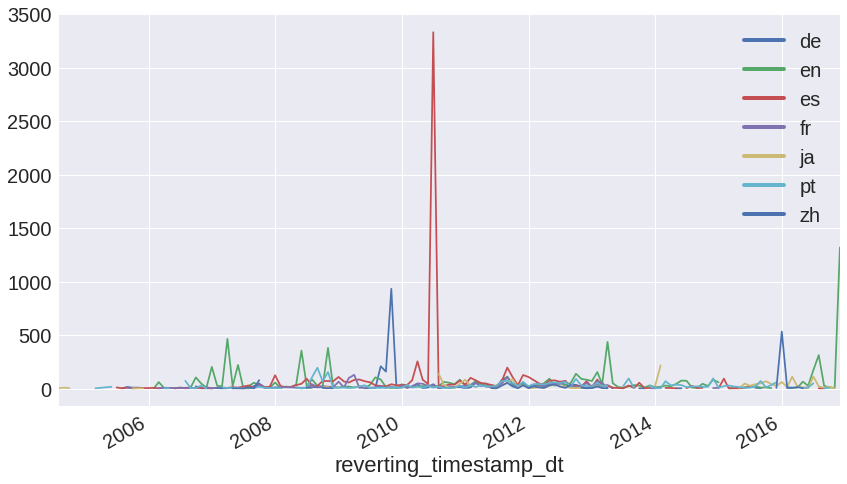

In [44]:
sns.set(font_scale=2)
groupby.rev_id.count().unstack().transpose().plot(figsize=[14,8])
leg = plt.legend()

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

That big spike in 2010 in es looks like a botfight! I dug into this and it is Muro Bot reverting User:EmBOTTellado, which had made systematic changes to coor fields in infobox templates that broke the template. 

https://es.wikipedia.org/w/index.php?title=Especial:Contribuciones&offset=20100603145542&limit=500&contribs=user&target=Muro+Bot&namespace=&tagfilter=

https://es.wikipedia.org/w/index.php?title=Vimianzo&diff=prev&oldid=37702998
https://es.wikipedia.org/w/index.php?title=Torresandino&diff=prev&oldid=37703012

### Mean days to revert by language and namespace

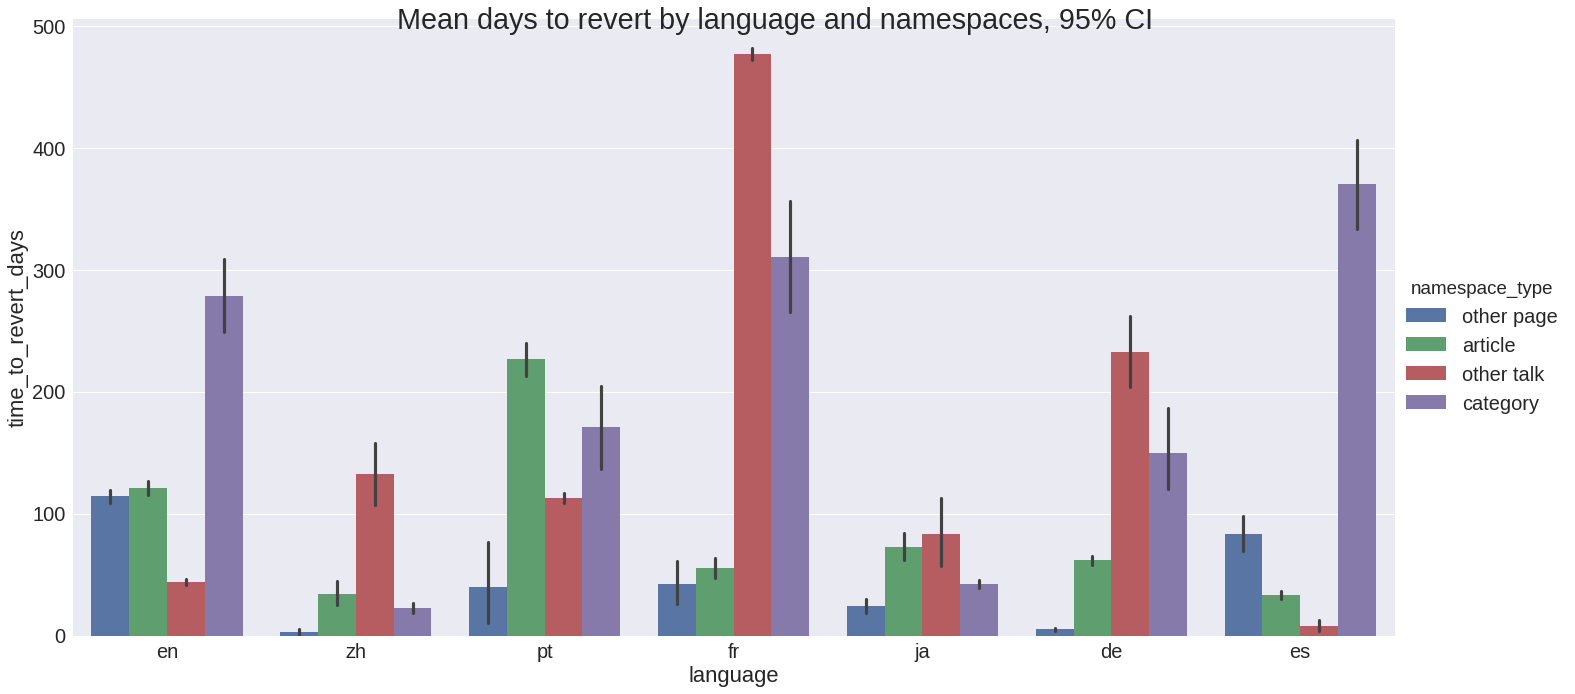

In [12]:
g = sns.factorplot(data=df_all,
                   x='language',
                   y='time_to_revert_days',
                   hue='namespace_type',
                   kind='bar',
                   size=10,
                   aspect = 2)

plt.suptitle("Mean days to revert by language and namespaces, 95% CI")

### Median days to revert by language and namespace

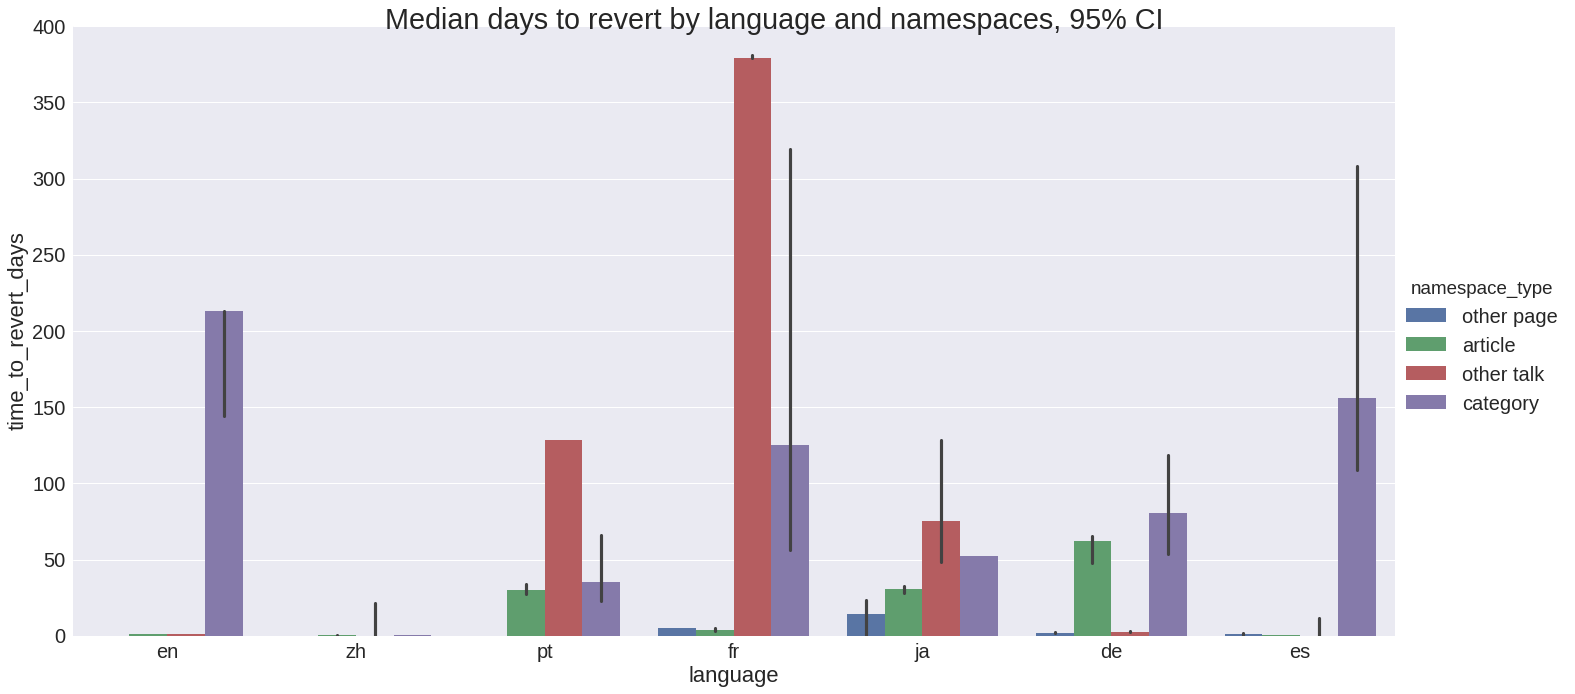

In [13]:
sns.set(font_scale=2)

g = sns.factorplot(data=df_all,
                   x='language',
                   y='time_to_revert_days',
                   hue='namespace_type',
                   kind='bar',
                   estimator=np.median,
                   size=10,
                   aspect = 2)

plt.suptitle("Median days to revert by language and namespaces, 95% CI")

### Mean days to revert by language and year, all namespaces

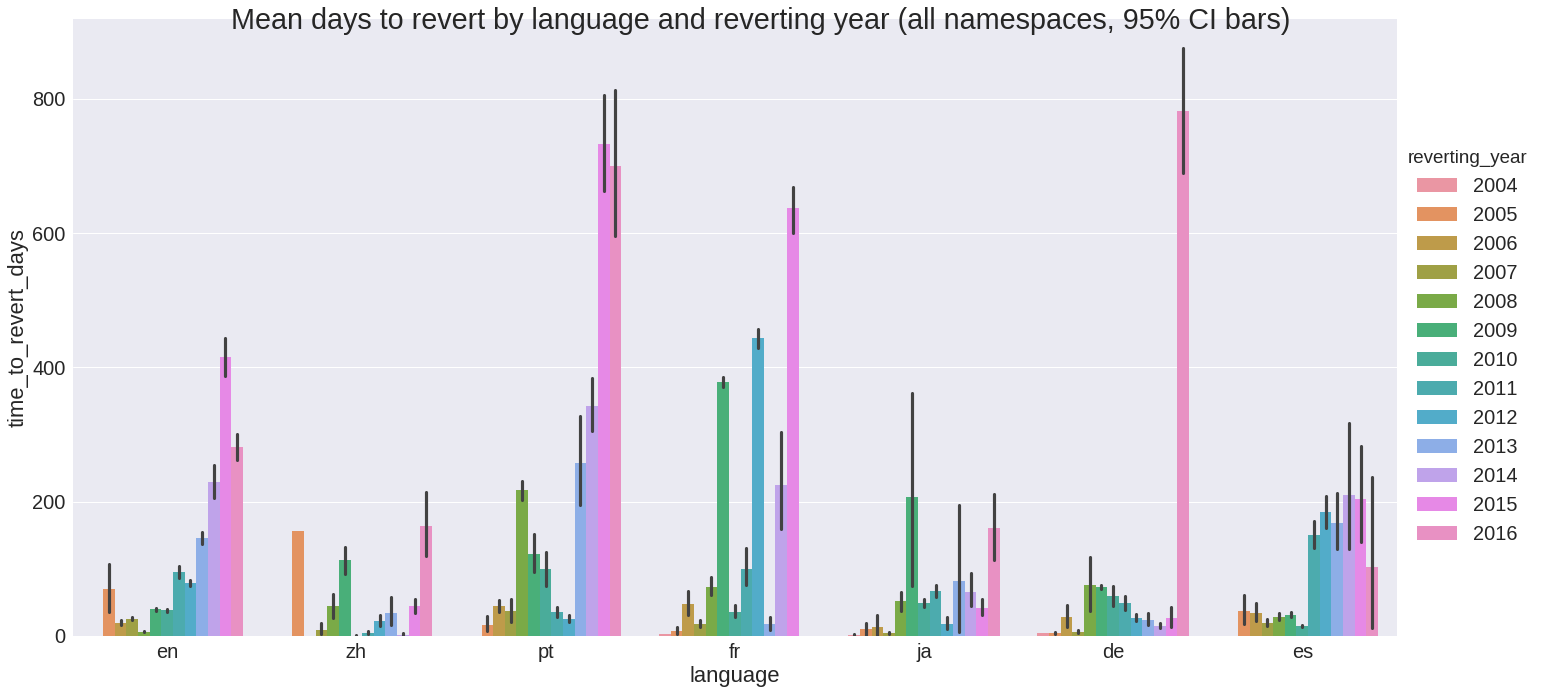

In [14]:
sns.set(font_scale=2)

g = sns.factorplot(data=df_all,
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   size=10,
                   aspect = 2)

plt.suptitle("Mean days to revert by language and reverting year (all namespaces, 95% CI bars)")

### Median days to revert by language and year, all namespaces

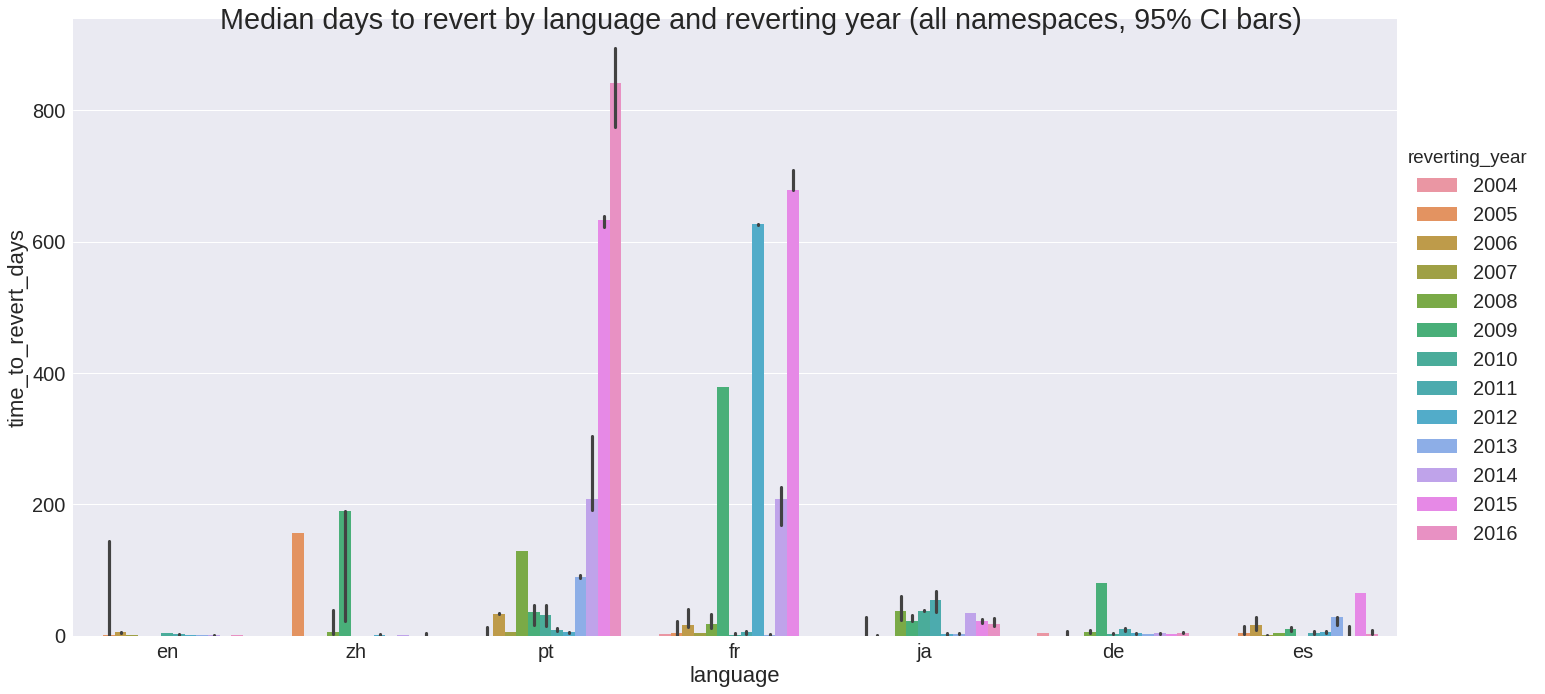

In [15]:
sns.set(font_scale=2)

g = sns.factorplot(data=df_all,
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   estimator=np.median,
                   size=10,
                   aspect = 2)

plt.suptitle("Median days to revert by language and reverting year (all namespaces, 95% CI bars)")

### Mean days to revert by language and year, articles only

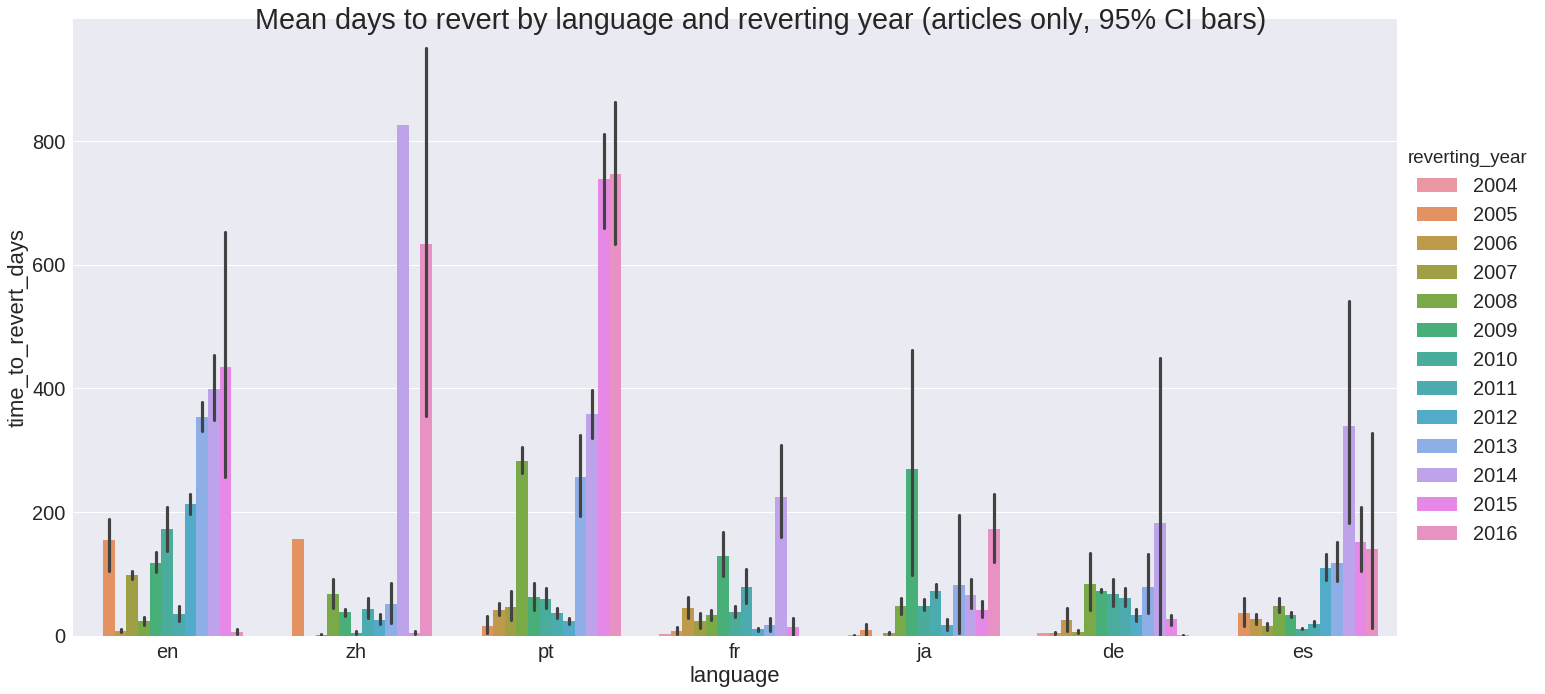

In [16]:
sns.set(font_scale=2)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   size=10,
                   aspect = 2)

plt.suptitle("Mean days to revert by language and reverting year (articles only, 95% CI bars)")

### Median days to revert by language and year, articles only

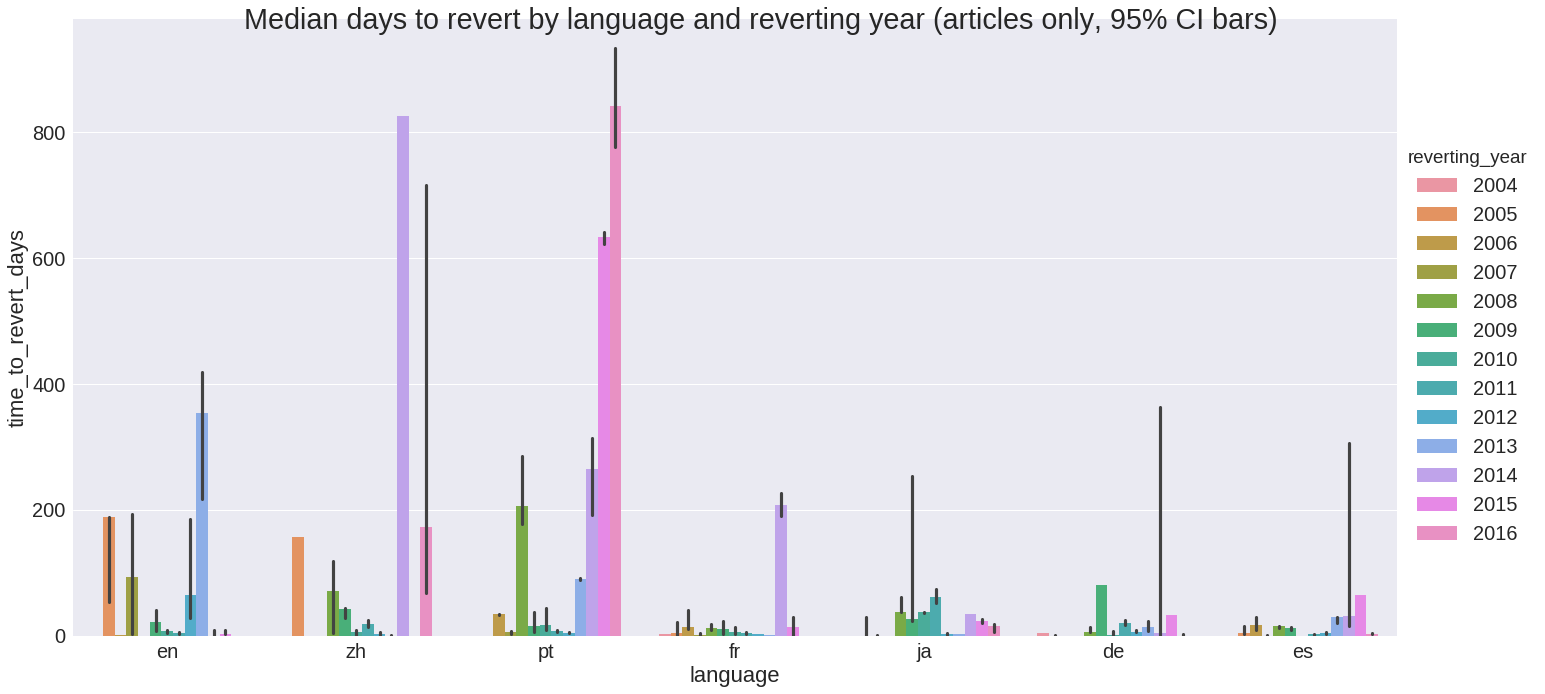

In [17]:
sns.set(font_scale=2)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   estimator=np.median,                   
                   size=10,
                   aspect = 2)

plt.suptitle("Median days to revert by language and reverting year (articles only, 95% CI bars)")

### Descriptive statistics for time to revert, hours

In [18]:
describe_dict = {}

for lang, lang_df in df_dict.items():
    describe_dict[lang]= df_dict[lang]['time_to_revert_hrs'].describe()
    
    print("language:", lang)
    print(describe_dict[lang])
    print("\n")

language: en
count    47769.000000
mean      2061.805194
std       6701.662227
min          0.000278
25%          0.855278
50%         11.763333
75%        311.569444
max      76185.728611
Name: time_to_revert_hrs, dtype: float64


language: zh
count     5306.000000
mean       501.960189
std       2603.551900
min          0.027500
25%          0.964722
50%          6.010278
75%         17.270000
max      53523.496389
Name: time_to_revert_hrs, dtype: float64


language: pt
count     3662.000000
mean      4987.136817
std       8783.711549
min          0.000556
25%        131.933056
50%        923.561389
75%       4862.797083
max      49726.068889
Name: time_to_revert_hrs, dtype: float64


language: fr
count     6042.000000
mean      7360.129364
std       6480.117946
min          0.000556
25%        132.796111
50%       9076.499167
75%      14759.821944
max      45629.216667
Name: time_to_revert_hrs, dtype: float64


language: ja
count     2110.000000
mean      1644.317156
std       5542.

### Descriptive statistics for time to revert, days

In [19]:
for lang, lang_df in df_dict.items():
    print("language:", lang)
    print((df_dict[lang]['time_to_revert_hrs']/24).describe())
    print("\n")



language: en
count    47769.000000
mean        85.908550
std        279.235926
min          0.000012
25%          0.035637
50%          0.490139
75%         12.982060
max       3174.405359
Name: time_to_revert_hrs, dtype: float64


language: zh
count    5306.000000
mean       20.915008
std       108.481329
min         0.001146
25%         0.040197
50%         0.250428
75%         0.719583
max      2230.145683
Name: time_to_revert_hrs, dtype: float64


language: pt
count    3662.000000
mean      207.797367
std       365.987981
min         0.000023
25%         5.497211
50%        38.481725
75%       202.616545
max      2071.919537
Name: time_to_revert_hrs, dtype: float64


language: fr
count    6042.000000
mean      306.672057
std       270.004914
min         0.000023
25%         5.533171
50%       378.187465
75%       614.992581
max      1901.217361
Name: time_to_revert_hrs, dtype: float64


language: ja
count    2110.000000
mean       68.513215
std       230.927026
min         0.000405

## Plotting histogram distribution of time differences

### KDE plots


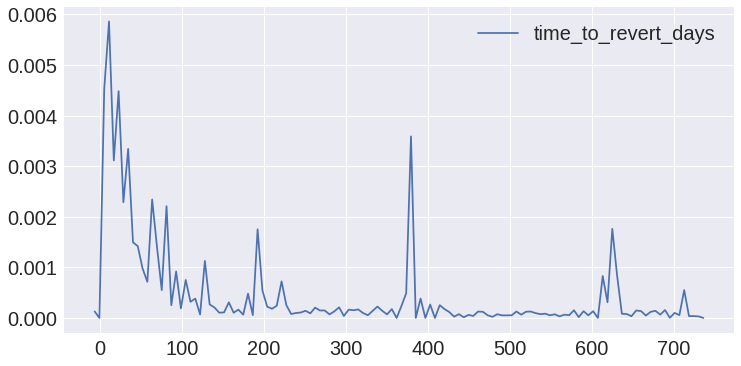

In [20]:
fig, ax = plt.subplots(figsize=[12,6])
sns.kdeplot(df_all['time_to_revert_days'], clip=[0,(365*2)], ax=ax)


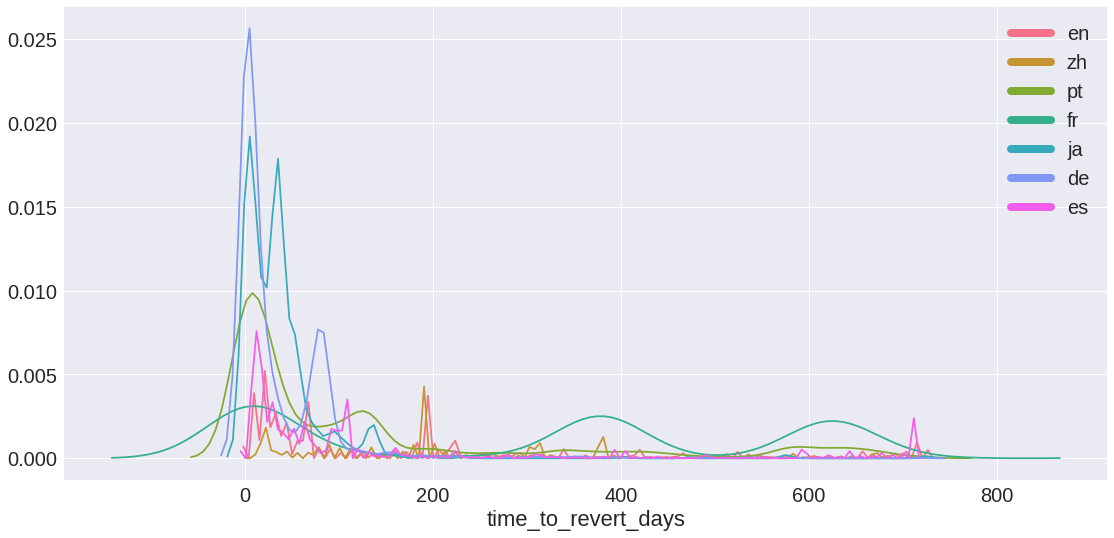

In [21]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all, palette=pal, hue="language", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_days", clip=[0,(365*2)])
#g.add_legend()
leg = plt.legend()

for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

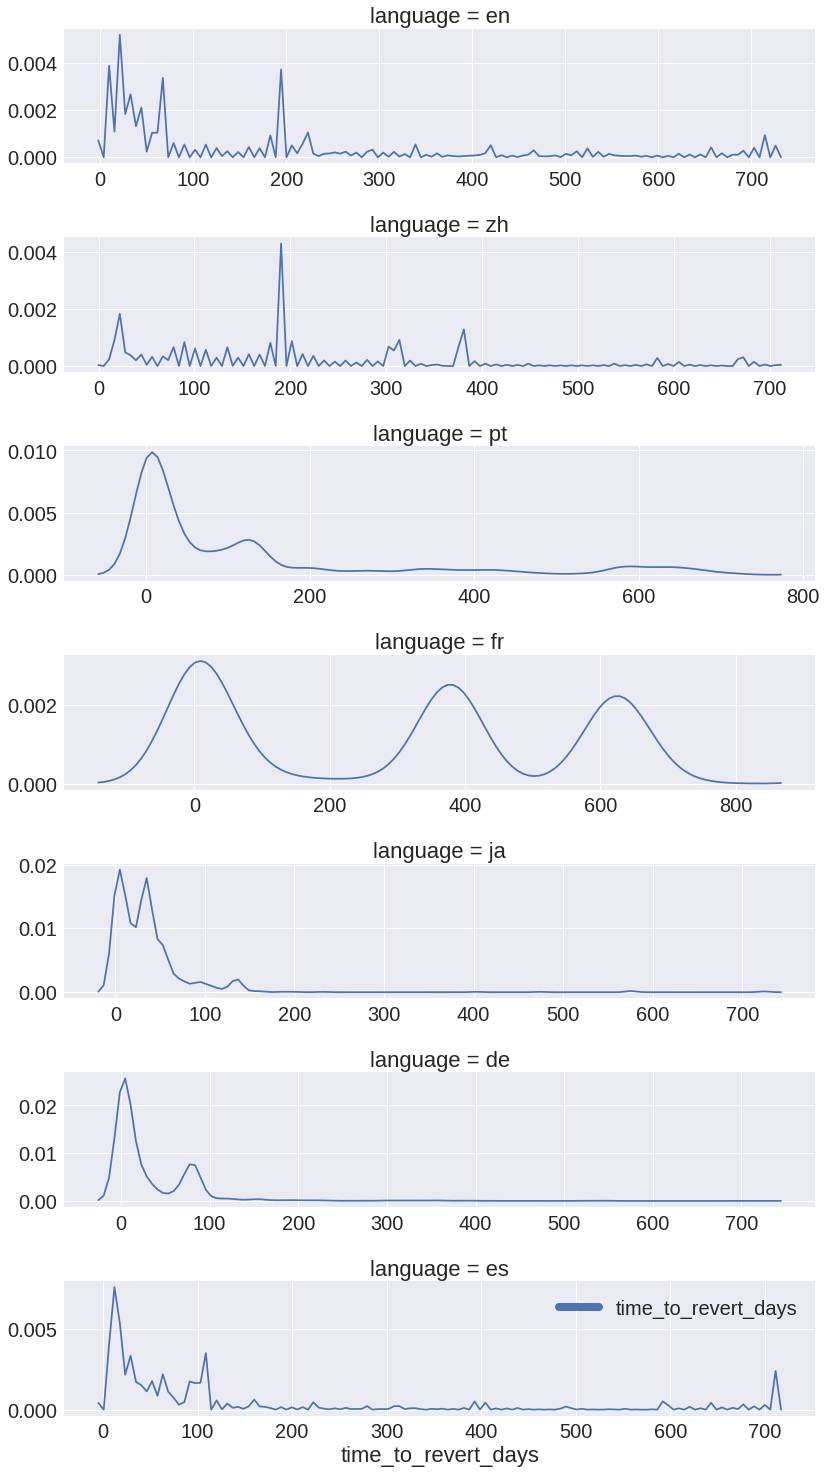

In [22]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all, palette=pal, row="language", size=3, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_days", clip=[0,(365*2)])
#g.add_legend()
leg = plt.legend()

for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

### Traditional histograms

Note: I'm not 100% sure I'm doing the manual histograms correctly

### Time to revert, articles only, more bins

In [23]:
bins=[0,(1/60),(5/60),(10/60),(30/60),1,2,4,8,12,24,72,(24*7), (24*30), (24*180), (24*365), (24*365*2)]
bin_labels = ["<=1 min",
              "5 mins",
              "10 mins",
              "30 mins",
              "1 hr",
              "2 hrs",
              "4 hrs",
              "8 hrs",
              "12 hrs",
              "24 hrs",
              "3 days",
              "7 days",
              "30 days",
              "180 days",
              "1 year",
              ">2 years"]

In [24]:
hist_counts_dict = {}
hist_bins_dict = {}

for lang, lang_df in df_dict.items():
    #print(lang)
    hist_counts_dict[lang], hist_bins_dict[lang] = np.histogram(lang_df[lang_df['page_namespace']==0]['time_to_revert_hrs'], bins=bins)

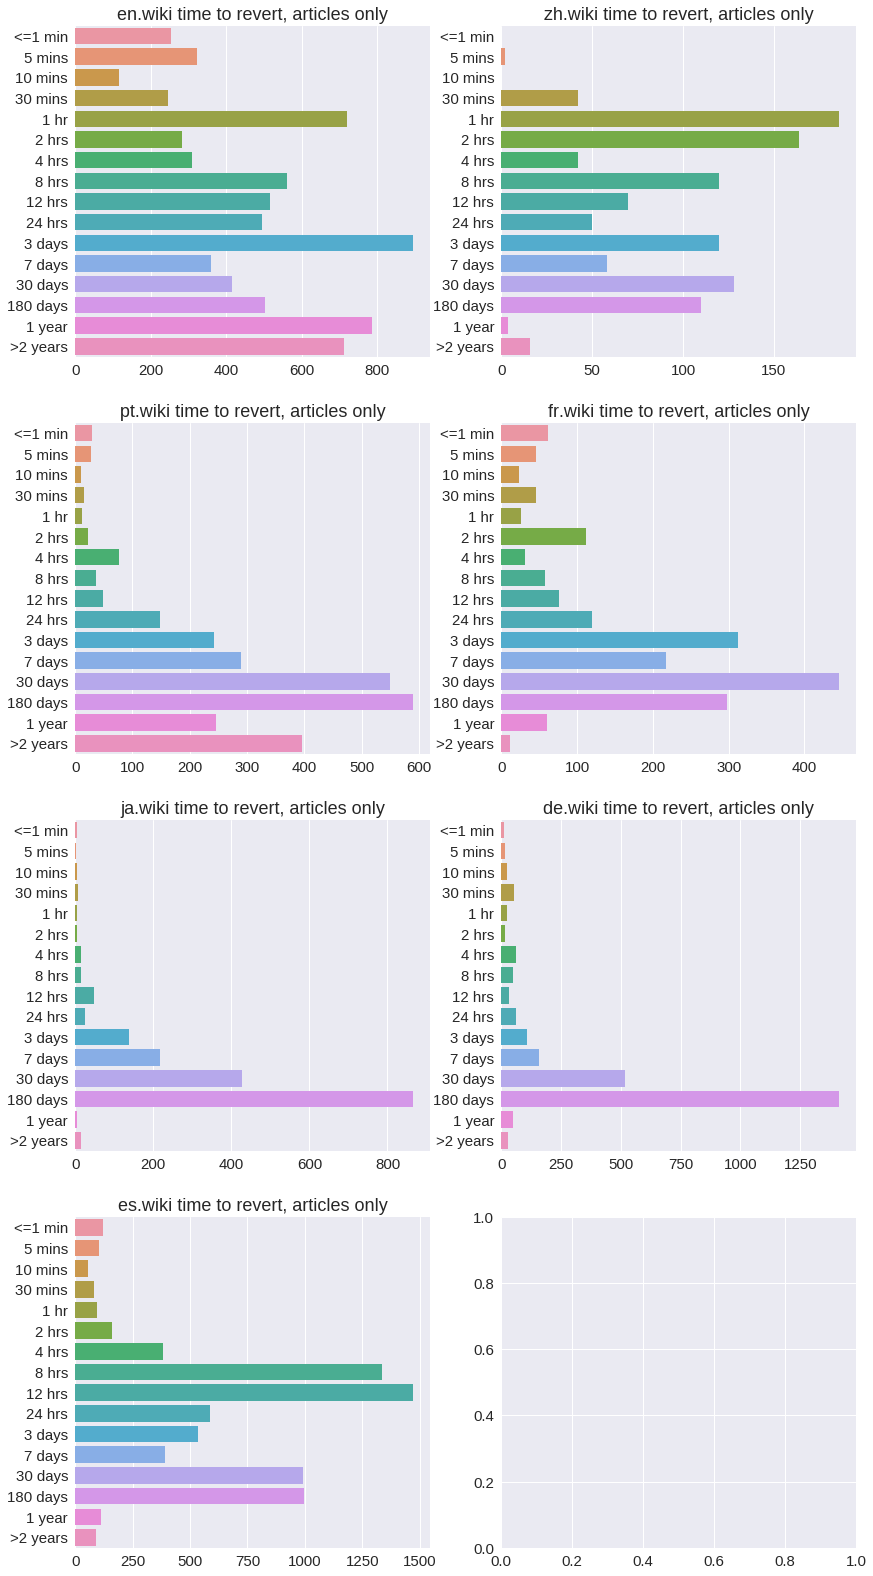

In [25]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=[14,28])

count = 0
for lang, lang_df in df_dict.items():
    row = count // 2
    col = count % 2
    ax_curr = axes[row, col]
    
    hist_counts_curr = hist_counts_dict[lang]
    hist_bins_curr = hist_bins_dict[lang][1:]
    
    sns.barplot(x=hist_counts_curr, y=hist_bins_curr, ax=ax_curr, orient="h")
    txt = ax_curr.set_yticklabels(bin_labels)
    #lt.xticks(rotation='vertical')
    ax_curr.set_title(lang + ".wiki time to revert, articles only")
    count = count + 1

### Time to revert, articles only, fewer bins

In [26]:
bins=[0,(5/60),1,24,(24*7), (24*30), (24*90), (24*180), (24*365), (24*365*2), (24*365*15)]
bin_labels = ["<5 mins",
              "5-60 mins",
              "1-24 hrs",
              "1-7 days",
              "7-30 days",
              "30-90 days",
              "90-180 days",
              "180 days-1 year",
              "1-2 years",
              ">2 years"]

In [27]:
hist_counts_dict = {}
hist_bins_dict = {}

for lang, lang_df in df_dict.items():
    #print(lang)
    hist_counts_dict[lang], hist_bins_dict[lang] = np.histogram(lang_df[lang_df['page_namespace']==0]['time_to_revert_hrs'], bins=bins)

#### No shared x axis

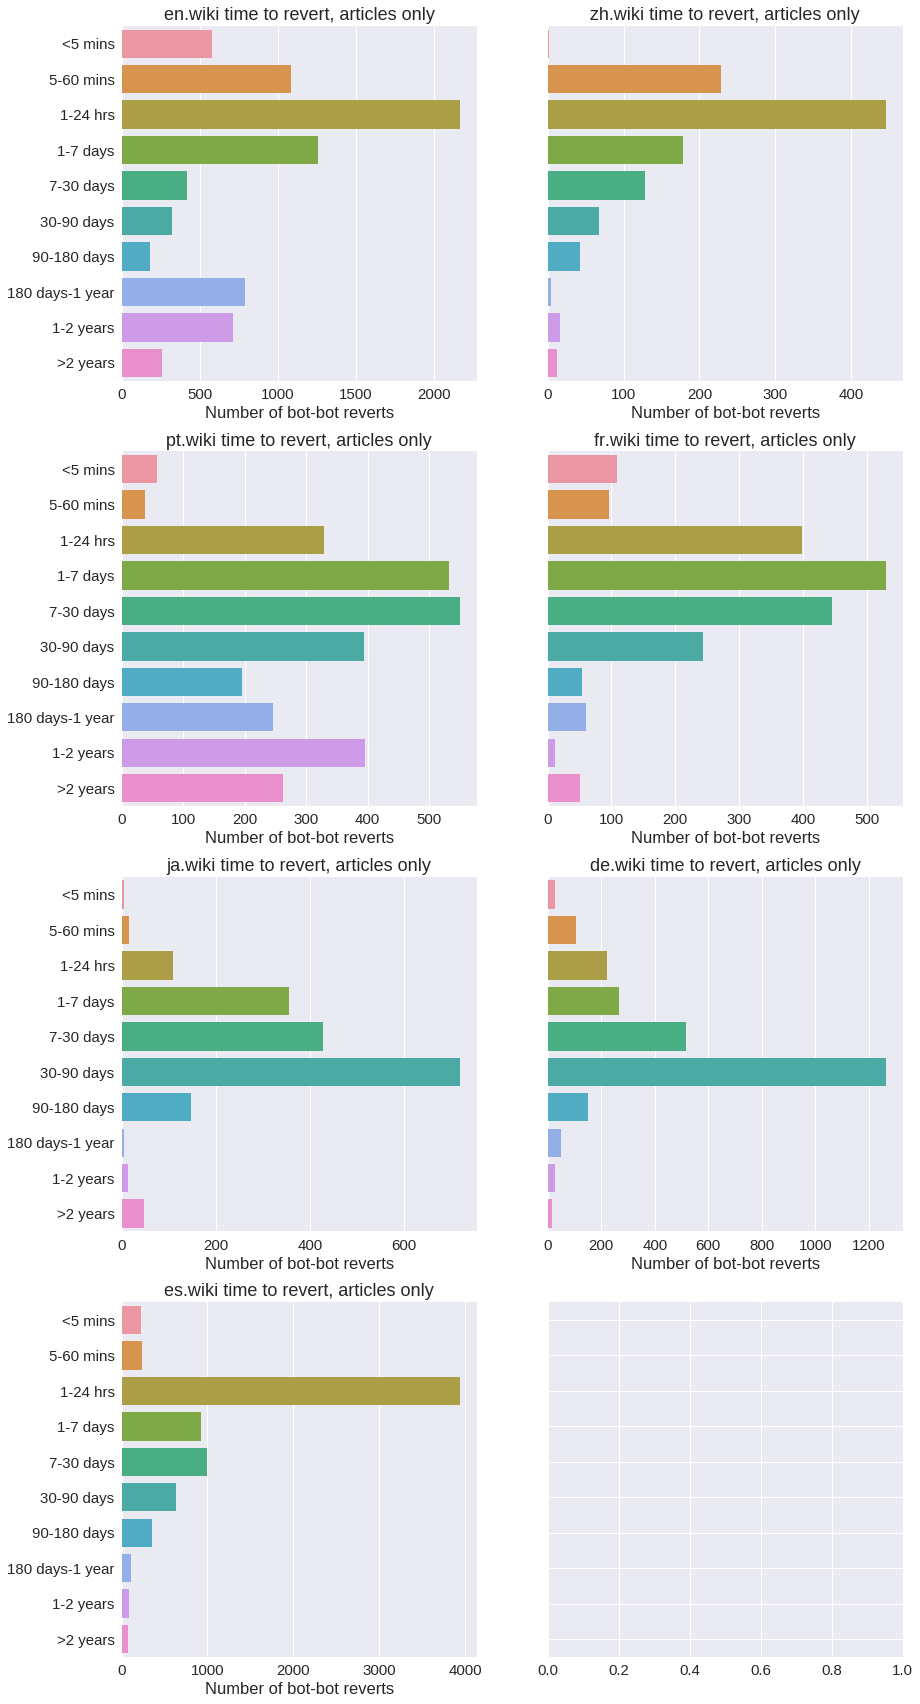

In [28]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=[14,30], sharey=True, sharex=False)

count = 0
for lang, lang_df in df_dict.items():
    row = count // 2
    col = count % 2
    ax_curr = axes[row, col]
    
    hist_counts_curr = hist_counts_dict[lang]
    hist_bins_curr = hist_bins_dict[lang][1:]
    
    sns.barplot(x=hist_counts_curr, y=hist_bins_curr, ax=ax_curr, orient="h")
    txt = ax_curr.set_yticklabels(bin_labels)
    ax_curr.set_xlabel("Number of bot-bot reverts")
    #lt.xticks(rotation='vertical')
    ax_curr.set_title(lang + ".wiki time to revert, articles only")
    count = count + 1

### Time to revert, all namespaces, more bins

In [29]:
bins=[0,(1/60),(5/60),(10/60),(30/60),1,2,4,8,12,24,72,(24*7), (24*30), (24*180), (24*365), (24*365*2)]
bin_labels = ["<=1 min",
              "5 mins",
              "10 mins",
              "30 mins",
              "1 hr",
              "2 hrs",
              "4 hrs",
              "8 hrs",
              "12 hrs",
              "24 hrs",
              "3 days",
              "7 days",
              "30 days",
              "180 days",
              "1 year",
              ">2 years"]

In [30]:
hist_counts_dict = {}
hist_bins_dict = {}

for lang, lang_df in df_dict.items():
    #print(lang)
    hist_counts_dict[lang], hist_bins_dict[lang] = np.histogram(df_dict[lang]['time_to_revert_hrs'], bins=bins)

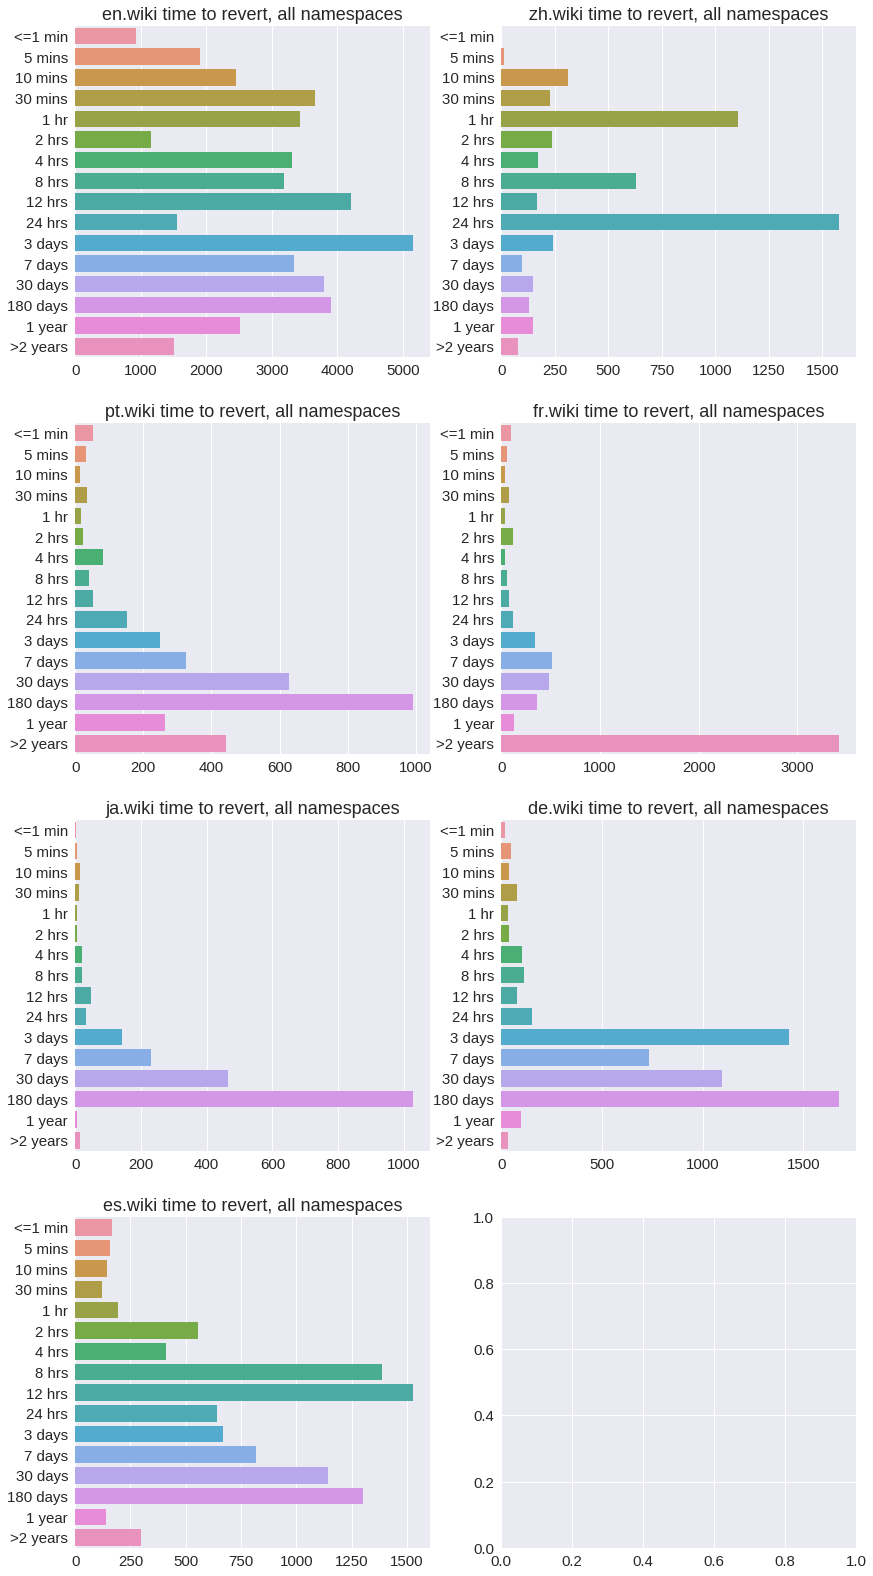

In [31]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=[14,28])

count = 0
for lang, lang_df in df_dict.items():
    row = count // 2
    col = count % 2
    ax_curr = axes[row, col]
    
    hist_counts_curr = hist_counts_dict[lang]
    hist_bins_curr = hist_bins_dict[lang][1:]
    
    sns.barplot(x=hist_counts_curr, y=hist_bins_curr, ax=ax_curr, orient="h")
    txt = ax_curr.set_yticklabels(bin_labels)
    #lt.xticks(rotation='vertical')
    ax_curr.set_title(lang + ".wiki time to revert, all namespaces")
    count = count + 1

### Time to revert, all namespaces, fewer bins

In [32]:
bins=[0,(5/60),1,24,(24*7), (24*30), (24*90), (24*180), (24*365), (24*365*2), (24*365*15)]
bin_labels = ["<5 mins",
              "5-60 mins",
              "1-24 hrs",
              "1-7 days",
              "7-30 days",
              "30-90 days",
              "90-180 days",
              "180 days-1 year",
              "1-2 years",
              ">2 years"]

In [33]:
hist_counts_dict = {}
hist_bins_dict = {}

for lang, lang_df in df_dict.items():
    #print(lang)
    hist_counts_dict[lang], hist_bins_dict[lang] = np.histogram(df_dict[lang]['time_to_revert_hrs'], bins=bins)

#### No shared x axis

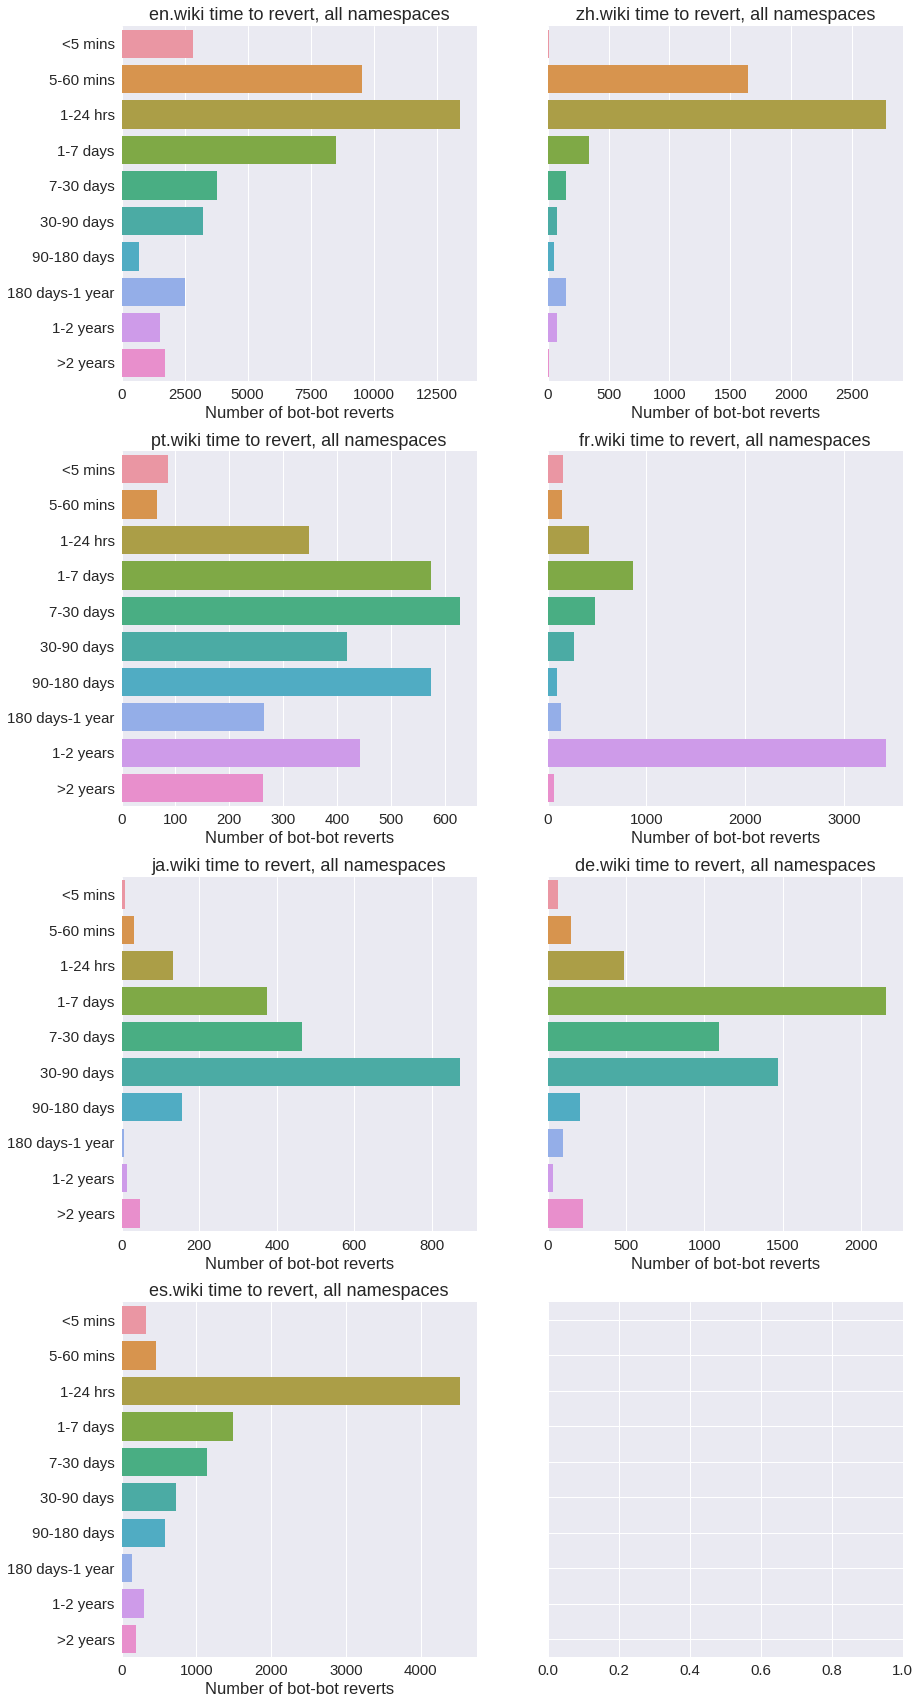

In [34]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=[14,30], sharey=True, sharex=False)

count = 0
for lang, lang_df in df_dict.items():
    row = count // 2
    col = count % 2
    ax_curr = axes[row, col]
    
    hist_counts_curr = hist_counts_dict[lang]
    hist_bins_curr = hist_bins_dict[lang][1:]
    
    sns.barplot(x=hist_counts_curr, y=hist_bins_curr, ax=ax_curr, orient="h")
    txt = ax_curr.set_yticklabels(bin_labels)
    ax_curr.set_xlabel("Number of bot-bot reverts")
    #lt.xticks(rotation='vertical')
    ax_curr.set_title(lang + ".wiki time to revert, all namespaces")
    count = count + 1

#### With shared x axis

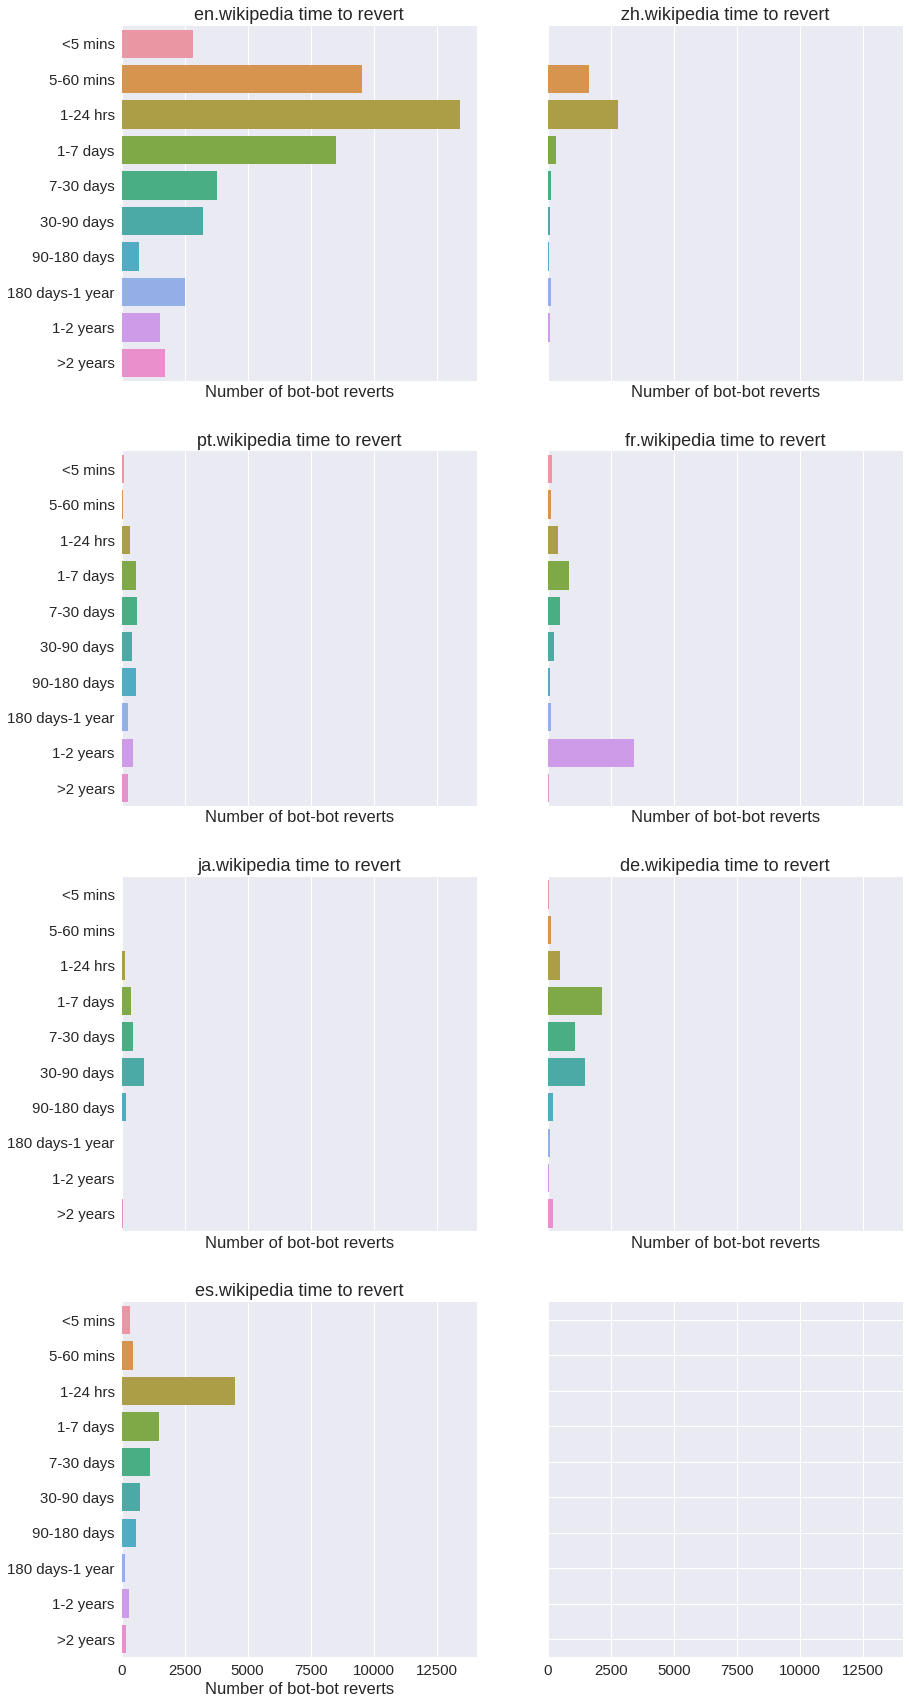

In [35]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=[14,30], sharey=True, sharex=True)

count = 0
for lang, lang_df in df_dict.items():
    row = count // 2
    col = count % 2
    ax_curr = axes[row, col]
    
    hist_counts_curr = hist_counts_dict[lang]
    hist_bins_curr = hist_bins_dict[lang][1:]
    
    sns.barplot(x=hist_counts_curr, y=hist_bins_curr, ax=ax_curr, orient="h")
    txt = ax_curr.set_yticklabels(bin_labels)
    ax_curr.set_xlabel("Number of bot-bot reverts")
    #lt.xticks(rotation='vertical')
    ax_curr.set_title(lang + ".wikipedia time to revert")
    count = count + 1

### Time to revert, all namespaces, enwiki big

In [36]:
bins=[0,(5/60),1,24,(24*7), (24*30), (24*90), (24*180), (24*365), (24*365*2), (25*365*15)]
bin_labels = ["<5 mins",
              "5-60 mins",
              "1-24 hrs",
              "1-7 days",
              "7-30 days",
              "30-90 days",
              "90-180 days",
              "180 days-1 year",
              "1-2 years",
              ">2 years"]
count, division = np.histogram(df_dict['en']['time_to_revert_hrs'], bins=bins)

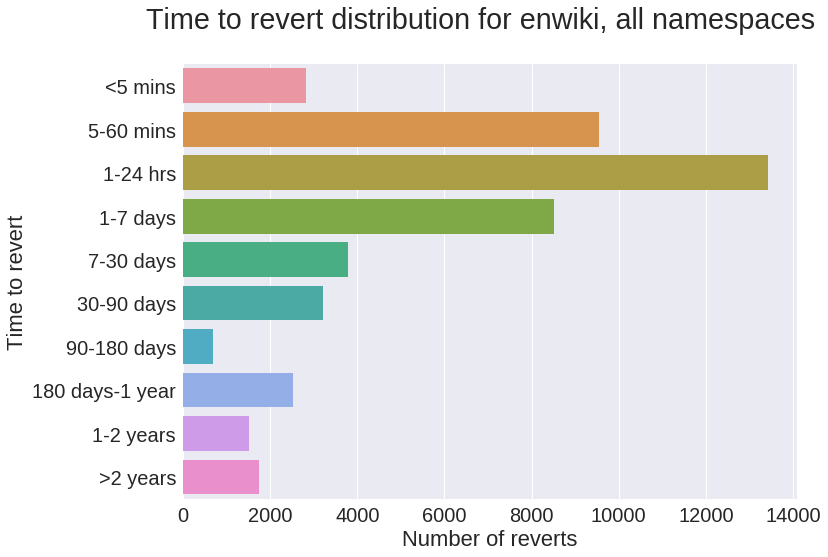

In [37]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=[11,8])
sns.barplot(x=count, y=division[1:], ax=ax, orient="h")
txt = ax.set_yticklabels(bin_labels)
#plt.xticks(rotation='vertical')
ax.set_xlabel("Number of reverts")
ax.set_ylabel("Time to revert")
plt.suptitle("Time to revert distribution for enwiki, all namespaces")

### Time to revert, articles only, fewer bins, enwiki big

In [38]:
bins=[0,(5/60),1,24,(24*7), (24*30), (24*90), (24*180), (24*365), (24*365*2), (24*365*15)]
bin_labels = ["<5 mins",
              "5-60 mins",
              "1-24 hrs",
              "1-7 days",
              "7-30 days",
              "30-90 days",
              "90-180 days",
              "180 days-1 year",
              "1-2 years",
              ">2 years"]

df_en = df_dict['en']
count, division = np.histogram(df_en[df_en['page_namespace']==0]['time_to_revert_hrs'], bins=bins)

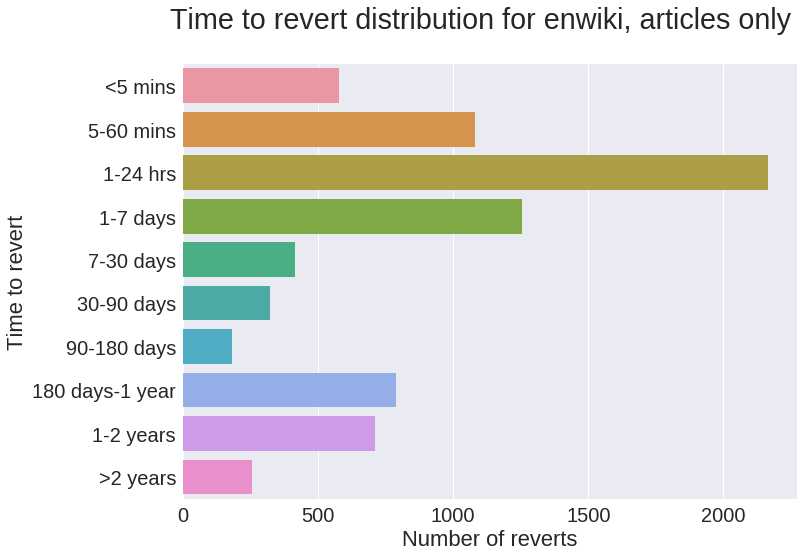

In [39]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=[11,8])
sns.barplot(x=count, y=division[1:], ax=ax, orient="h")
txt = ax.set_yticklabels(bin_labels)
#plt.xticks(rotation='vertical')
ax.set_xlabel("Number of reverts")
ax.set_ylabel("Time to revert")
plt.suptitle("Time to revert distribution for enwiki, articles only")